# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1

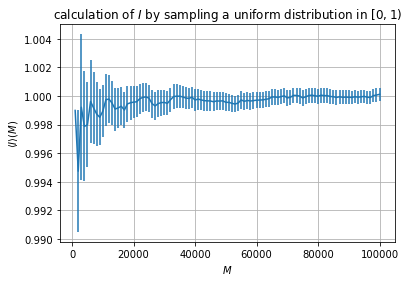

In [1]:
import numpy as np
import matplotlib.pyplot as plt

M, I_mean, I_mean_std = np.loadtxt("data/I_p_prog.txt", delimiter=',', skiprows=1, unpack = 'True')
plt.errorbar(M, I_mean, I_mean_std)
plt.xlabel(r"$M$")
plt.ylabel(r"$\langle I \rangle(M)$")
plt.title(r"calculation of $I$ by sampling a uniform distribution in $[0, 1)$")
plt.grid()

plt.show()

### Exercise 02.2